In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import decode_predictions
from keras.models import Model, load_model
import keras.backend as K

import model as tcav_model
import tcav as tcav
import utils as utils
import activation_generator as act_gen
import tensorflow as tf
import utils_plot as utils_plot


from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from numpy.linalg import norm

import pickle
#from bunch import bunchify

import cav as cav

from os import listdir
from os.path import isfile, join
import operator
from PIL import Image
from keras.preprocessing import image

import os

import PIL.Image
from sklearn.metrics import pairwise



/data/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = None
model = load_model('v3_model.h5')

Instructions for updating:
Colocations handled automatically by placer.


/data/anaconda/envs/py35/lib/python3.5/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
sess = K.get_session()

endpoints_v3 = dict(
    input=model.inputs[0].name,
    input_tensor=model.inputs[0],
    logit=model.outputs[0].name,
    prediction=model.outputs[0].name,
    prediction_tensor=model.outputs[0],
)

tf.logging.set_verbosity(0)

working_dir = '/home/tyler/Desktop/tcav_on_azure'

label_path = os.path.join(working_dir,'labels.txt')

mymodel = tcav_model.KerasModelWrapper(sess, 
        label_path, [299, 299, 3], endpoints_v3, 
        'InceptionV3_public', (-1, 1))

Instructions for updating:
Use tf.cast instead.


In [8]:
## Run specific CAV
hparams = tf.contrib.training.HParams(model_type='logistic', alpha=.1)

bottleneck = bottlenecks[0]
target_class = target
concepts = ['striped_sub_1', 'random500_0']

act_generator = act_gen.ImageActivationGenerator(mymodel, source_dir, activation_dir, max_examples=50)
acts = act_generator.process_and_load_activations([bottleneck], concepts + [target_class])

cav.get_or_train_cav(concepts,bottleneck,acts,cav_hparams=hparams,cav_dir='cavs')

['striped_sub_1', 'random500_0', 'zebra']


/data/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [4]:
#working_dir = '/Users/tyler/Desktop/dissertation/programming/tcav'
working_dir = '/home/tyler/Desktop/tcav_on_azure'

activation_dir =  working_dir + '/activations/'
cav_dir = working_dir + '/cavs/'
source_dir = working_dir + '/concepts/'

target = 'suit'

concepts = ['banded_sub_1']   

#'mixed0','mixed1', 'mixed2', 'mixed3', 'mixed4', 'mixed5', 'mixed6', 'mixed7', 'mixed8', 'mixed9_0', 'mixed9', 'mixed9_1', 'mixed10'

bottlenecks = ['mixed9']

alphas = [0.1]

In [5]:
act_generator = act_gen.ImageActivationGenerator(mymodel, source_dir, activation_dir, max_examples=50)

tf.logging.set_verbosity(1)

num_random = 2

mytcav = tcav.TCAV(sess,
        target, concepts, bottlenecks,
        act_generator, alphas,
        cav_dir = cav_dir,
        num_random_exp=num_random)


INFO:tensorflow:mixed9 ['banded_sub_1', 'random500_0'] suit 0.1
INFO:tensorflow:mixed9 ['banded_sub_1', 'random500_1'] suit 0.1
INFO:tensorflow:mixed9 ['random500_0', 'random500_1'] suit 0.1
INFO:tensorflow:mixed9 ['random500_1', 'random500_0'] suit 0.1
INFO:tensorflow:TCAV will 4 params


In [6]:
results = mytcav.run(run_parallel=True)

INFO:tensorflow:running 4 params
INFO:tensorflow:running suit ['banded_sub_1', 'random500_0']
INFO:tensorflow:running suit ['banded_sub_1', 'random500_1']
INFO:tensorflow:running suit ['random500_0', 'random500_1']
['banded_sub_1', 'random500_1', 'suit']
['banded_sub_1', 'random500_0', 'suit']
INFO:tensorflow:running suit ['random500_1', 'random500_0']
['random500_0', 'random500_1', 'suit']
['random500_1', 'random500_0', 'suit']
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_random500_1_mixed9 shape (50, 8, 8, 2048)
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_random500_0_mixed9 shape (50, 8, 8, 2048)
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_random500_0_mixed9 shape (50, 8, 8, 2048)
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_random500_1_mixed9 shape (50, 8, 8, 2048)
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_suit_mixed9 shape (50, 8, 8, 

Level 1:tensorflow:Registering LoadTPUEmbeddingAdagradParametersGradAccumDebug (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering LoadTPUEmbeddingCenteredRMSPropParameters (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering LoadTPUEmbeddingFTRLParameters (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering LoadTPUEmbeddingFTRLParametersGradAccumDebug (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering LoadTPUEmbeddingMDLAdagradLightParameters (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering LoadTPUEmbeddingMomentumParameters (

Level 1:tensorflow:Registering _WaitForDistributedTPU (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering _SetGlobalTPUArray (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering _ShutdownDistributedTPU (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering _InitializeHostForDistributedTPU (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering _DisconnectHostFromDistributedTPUSystem (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering AllToAll (<function _all_to_all_grad at 0x7f6f662518c8>) in gradient.
Level 1:tensorflow:Registering Coll

Level 1:tensorflow:Registering TraverseTreeV4 (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering TreeDeserialize (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering TreeIsInitializedOp (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering TreePredictionsV4 (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering TreeSerialize (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering TreeSize (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x7f70503d60d0>) in default shape functions.
Level 1:tensorflow:Registering UpdateM

/data/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


INFO:tensorflow:acc per class {'random500_1': 1.0, 'overall': 0.9696969696969697, 'banded_sub_1': 0.9375}
INFO:tensorflow:/home/tyler/Desktop/tcav_on_azure/cavs/banded_sub_1-random500_1-mixed9-linear-0.1_test.pkl
INFO:tensorflow:did save save_path_lin_sep
INFO:tensorflow:/home/tyler/Desktop/tcav_on_azure/activations/acts_banded_sub_1_mixed9 does not exist, Making one...
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_random500_0_mixed9 shape (50, 8, 8, 2048)
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_suit_mixed9 shape (50, 8, 8, 2048)
INFO:tensorflow:Training CAV ['banded_sub_1', 'random500_0'] - mixed9 alpha 0.1
INFO:tensorflow:training with alpha=0.1
INFO:tensorflow:using new version


/data/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


INFO:tensorflow:acc per class {'random500_0': 0.9411764705882353, 'overall': 0.9696969696969697, 'banded_sub_1': 1.0}
INFO:tensorflow:/home/tyler/Desktop/tcav_on_azure/cavs/banded_sub_1-random500_0-mixed9-linear-0.1_test.pkl
INFO:tensorflow:did save save_path_lin_sep
INFO:tensorflow:Done running 4 params. Took 35.25985360145569 seconds...


## Load CAV

In [10]:
working_dir = '/home/tyler/Desktop/tcav_on_azure'

class_1 = 'banded_sub_1'
class_2 = 'random500_0'
layer = 'mixed9'
lm_type = 'linear'

cav_name = class_1 + '-' + class_2 + '-' + layer + '-' + lm_type + '-0.1'
sub_path = 'cavs/' + cav_name + '.pkl'


path = os.path.join(working_dir, sub_path)

this_cav = cav.CAV.load_cav(path)

In [11]:
this_cav.concepts

['banded_sub_1', 'random500_0']

## Generate Activations

In [12]:
bottleneck = bottlenecks[0]
target_class = target

target_class,concepts = 'suit', ['banded_sub_1']
#my_class,concept = 'zebra','striped_sub_1'

acts = act_generator.process_and_load_activations([bottleneck], concepts + [target_class])


act_class = acts[target_class][bottleneck]
act_concept = acts[concepts[0]][bottleneck]


['banded_sub_1', 'suit']
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_banded_sub_1_mixed9 shape (50, 8, 8, 2048)
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_suit_mixed9 shape (50, 8, 8, 2048)


In [13]:
acts.keys()

dict_keys(['suit', 'banded_sub_1'])

In [15]:
len(acts[target_class][bottleneck])

50

In [16]:
# cosine similarity
import math
def cosine_similarity(v1,v2):
    # compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy / math.sqrt(sumxx*sumyy)

In [29]:
# image list
path = 'activations/images_used_' + my_class + '.pkl'
with open(path, 'rb') as f:
    data = pickle.load(f)
    
image_list = data

In [30]:
# make dict
ranked = {}

#concept = 'striped_sub_2'

# define cavs
striped_cav = this_cav.cavs[0]
striped_cav_2d = striped_cav.reshape(-1,1)

# image_list
for count, each in enumerate(image_list):
    
    demo_1 = acts[concept][bottleneck][count]
    demo_2d = demo_1.reshape(-1,1)
    
    cos = cosine_similarity(striped_cav_2d,demo_2d)
    
    ranked[each] = cos

In [31]:
## rank images
sorted_rank = sorted(ranked.items(), key=operator.itemgetter(1),reverse=True)

In [32]:
## show image
rank = 0

img_path, cos = sorted_rank[rank]
img = image.load_img(img_path, target_size=(299, 299))
#img

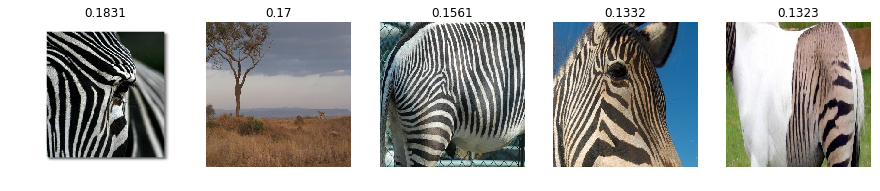

In [33]:
import matplotlib.pyplot as plt

w, h = 120, 120
fig = plt.figure(figsize=(15, 8))
columns, rows = 5, 1

start = 1

for i in range(1, columns*rows + 1):
    img_path, cos = sorted_rank[start + i - 2]
    img = image.load_img(img_path, target_size=(299, 299))
    fig.add_subplot(rows, columns, i)
    plt.title(round(cos[0],4))
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [22]:
#sorted_rank

## Get Activations

In [31]:
# image list
my_class = 'zebra'
path = 'activations/images_used_' + my_class + '.pkl'
with open(path, 'rb') as f:
    data = pickle.load(f)
    
image_list = data

In [32]:
#image_list

In [33]:
## loop through files

cav_1 = this_cav.cavs[0]
cav_1 = cav_1.reshape(-1,1)

new_rank = {}

#for img_path, cos_sim in sorted_rank:
for img_path in image_list:
    filename = img_path

    img = np.array(PIL.Image.open(tf.gfile.Open(filename, 'rb')).convert('RGB').resize((299,299), PIL.Image.BILINEAR))
    img = np.float32(img) / 255.0
    
    acts_1 = mymodel.run_examples([img], 'mixed9')
    acts_shaped =  mymodel.reshape_activations(acts_1).squeeze()
    acts_shaped = acts_shaped.reshape(-1,1)
    cos = cosine_similarity(cav_1,acts_shaped)
    new_rank[img_path] = cos

In [34]:
new_sorted_rank = sorted(new_rank.items(), key=operator.itemgetter(1),reverse=True)

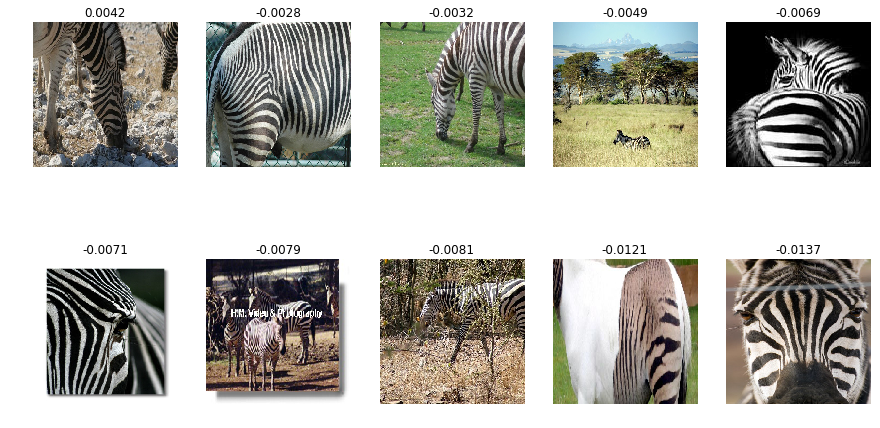

In [37]:
import matplotlib.pyplot as plt

w, h = 120, 120
fig = plt.figure(figsize=(15, 8))
columns, rows = 5, 2

start = 1

for i in range(1, columns*rows +1):
    img_path, cos = new_sorted_rank[start + i - 2]
    img = image.load_img(img_path, target_size=(299, 299))
    fig.add_subplot(rows, columns, i)
    plt.title(round(cos[0],4))
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [55]:
## perturb

In [38]:
for img_path in image_list:
    filename = img_path

    img = np.array(PIL.Image.open(tf.gfile.Open(filename, 'rb')).convert('RGB').resize(shape, PIL.Image.BILINEAR))
    img = np.float32(img) / 255.0
    
    acts_1 = mymodel.run_examples([img], 'mixed10')

NameError: name 'shape' is not defined

In [67]:
acts_1[0][0][0]

array([0.        , 0.        , 0.        , ..., 0.29479256, 0.        ,
       0.        ], dtype=float32)

In [62]:
perturbed_act = this_cav.perturb_act(acts_1,'striped_sub_2')

In [66]:
perturbed_act[0][0][0]

array([ 0.08471466, -0.08600735,  0.0034667 , ...,  0.44867757,
        0.04259563, -0.02487374])

In [ ]:
mymodel.get_predictions()

In [ ]:
sess = K.get_session()

endpoints_v3 = dict(
    input=model.inputs[0].name,
    input_tensor=model.inputs[0],
    logit=model.outputs[0].name,
    prediction=model.outputs[0].name,
    prediction_tensor=model.outputs[0],
)

tf.logging.set_verbosity(0)

working_dir = '/home/tyler/Desktop/tcav_on_azure'

label_path = os.path.join(working_dir,'labels.txt')

mymodel = tcav_model.KerasModelWrapper(sess, 
        label_path, [299, 299, 3], endpoints_v3, 
        'InceptionV3_public', (-1, 1))

In [41]:
#model.summary()

In [80]:
len(model.layers)

313

In [95]:
mixed_10 = model.layers[310]
mixed_10.get_input_at(0)

[<tf.Tensor 'activation_86/Relu:0' shape=(?, 8, 8, 320) dtype=float32>,
 <tf.Tensor 'mixed9_1/concat:0' shape=(?, 8, 8, 768) dtype=float32>,
 <tf.Tensor 'concatenate_2/concat:0' shape=(?, 8, 8, 768) dtype=float32>,
 <tf.Tensor 'activation_94/Relu:0' shape=(?, 8, 8, 192) dtype=float32>]

In [106]:
new_endpoints = dict(
    #input=model.inputs[0].name,
    input=mixed_10.name,
    input_tensor=mixed_10.input,
    logit=model.outputs[0].name,
    prediction=model.outputs[0].name,
    prediction_tensor=model.outputs[0],
)

tf.logging.set_verbosity(0)

working_dir = '/home/tyler/Desktop/tcav_on_azure'

label_path = os.path.join(working_dir,'labels.txt')

new_model = tcav_model.KerasModelWrapper(sess, 
        label_path, [299, 299, 3], new_endpoints, 
        'InceptionV3_public', (-1, 1))

In [111]:
type(perturbed_act)

numpy.ndarray

In [116]:
new_model.ends

{'input': [<tf.Tensor 'activation_86/Relu:0' shape=(?, 8, 8, 320) dtype=float32>,
  <tf.Tensor 'mixed9_1/concat:0' shape=(?, 8, 8, 768) dtype=float32>,
  <tf.Tensor 'concatenate_2/concat:0' shape=(?, 8, 8, 768) dtype=float32>,
  <tf.Tensor 'activation_94/Relu:0' shape=(?, 8, 8, 192) dtype=float32>],
 'prediction': <tf.Tensor 'predictions/Softmax:0' shape=(?, 1000) dtype=float32>}

In [103]:
mixed_10.input

[<tf.Tensor 'activation_86/Relu:0' shape=(?, 8, 8, 320) dtype=float32>,
 <tf.Tensor 'mixed9_1/concat:0' shape=(?, 8, 8, 768) dtype=float32>,
 <tf.Tensor 'concatenate_2/concat:0' shape=(?, 8, 8, 768) dtype=float32>,
 <tf.Tensor 'activation_94/Relu:0' shape=(?, 8, 8, 192) dtype=float32>]

In [98]:
model.inputs[0]

<tf.Tensor 'input_1:0' shape=(?, 299, 299, 3) dtype=float32>

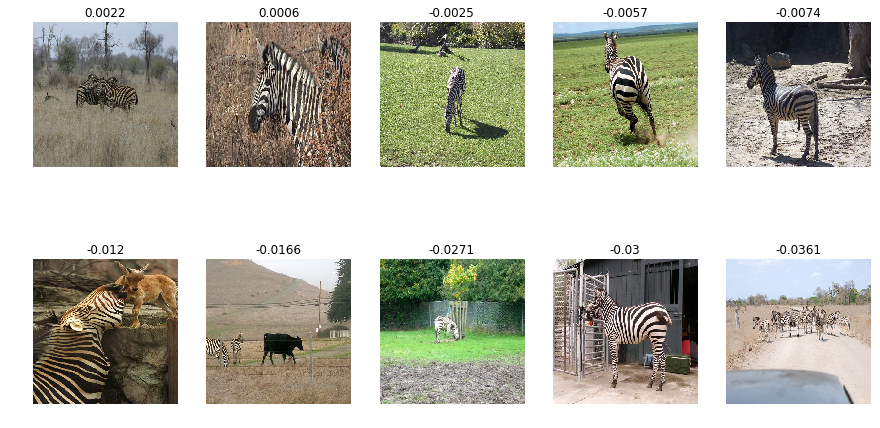

In [40]:
import matplotlib.pyplot as plt

w, h = 120, 120
fig = plt.figure(figsize=(15, 8))
columns, rows = 5, 2

start = 40

for i in range(1, columns*rows +1):
    img_path, cos = new_sorted_rank[start + i - 2]
    img = image.load_img(img_path, target_size=(299, 299))
    fig.add_subplot(rows, columns, i)
    plt.title(round(cos[0],4))
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [195]:
to_mixed_9 = model.layers[279]
to_mixed_9.output.name

'mixed9/concat:0'

In [199]:
## first_part

to_mixed_9 = model.layers[279]
to_mixed_9.get_input_at(0)

mixed_9 = model.layers[280]
mixed_9.get_input_at(0)

first_part_endpoints = dict(
    input=model.inputs[0].name,
    input_tensor=model.inputs[0],
    logit=to_mixed_9.output[0].name,
    prediction=to_mixed_9.output[0].name,
    prediction_tensor=to_mixed_9.output[0],
)

first_part_model = tcav_model.KerasModelWrapper(sess, 
        label_path, [299, 299, 3], first_part_endpoints, 
        'InceptionV3_public', (-1, 1))

In [202]:
pred_1 = first_part_model.get_predictions(x)

In [201]:
## second_part
mixed_9 = model.layers[280]
mixed_9.get_input_at(0)

second_part_endpoints = dict(
    input=mixed_9.name,
    input_tensor=mixed_9.input,
    logit=model.outputs[0].name,
    prediction=model.outputs[0].name,
    prediction_tensor=model.outputs[0],
)


second_part_model = tcav_model.KerasModelWrapper(sess, 
        label_path, [299, 299, 3], second_part_endpoints, 
        'InceptionV3_public', (-1, 1))


In [239]:
# perturb
img = image.load_img(img_path, target_size=(299, 299))
img_array = np.array(img)
img_new_dims = np.expand_dims(img_array, axis=0)
img_input = preprocess_input(img_new_dims)

pred_1 = first_part_model.get_predictions(img_input)
pred_1 = np.expand_dims(pred_1, axis=0)

pred_1_pert = this_cav.perturb_act(pred_1,'striped_sub_1',alpha = 5)

pred_2 = second_part_model.get_predictions(pred_1_pert)
decode_predictions(pred_2, top=5)

[[('n02389026', 'sorrel', 0.5091535),
  ('n03538406', 'horse_cart', 0.092085764),
  ('n03967562', 'plow', 0.017240232),
  ('n03124170', 'cowboy_hat', 0.010698552),
  ('n04049303', 'rain_barrel', 0.010435037)]]

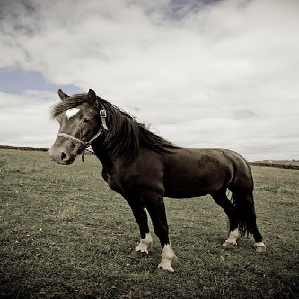

In [234]:
img

In [104]:
def files_from_dir(a_dir):
    onlyfiles = [f for f in os.listdir(a_dir) if os.path.isfile(os.path.join(a_dir, f))]
    return onlyfiles

In [227]:
this_dir = '/home/tyler/Desktop/tcav_on_azure/concepts/horse_sub_1'
imgs = files_from_dir(this_dir)

In [231]:
img_path = os.path.join(this_dir,imgs[2])

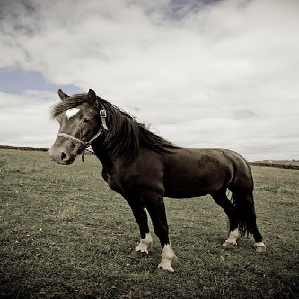

In [232]:
# Horse prediction
img = image.load_img(img_path, target_size=(299, 299))
img

In [131]:
from keras.applications.inception_v3 import preprocess_input

img_array = np.array(img)
x = np.expand_dims(img_array, axis=0)
x = preprocess_input(x)

pred = mymodel.get_predictions(x)
decode_predictions(pred, top=5)

[[('n01744401', 'rock_python', 0.41688702),
  ('n01740131', 'night_snake', 0.22719923),
  ('n01729322', 'hognose_snake', 0.14873463),
  ('n01751748', 'sea_snake', 0.06500338),
  ('n01737021', 'water_snake', 0.050590847)]]

In [132]:
## Perturb horse activations

In [136]:
filename = img_path

shape = (299,299)

img = np.array(PIL.Image.open(tf.gfile.Open(filename, 'rb')).convert('RGB').resize(shape, PIL.Image.BILINEAR))
img = np.float32(img) / 255.0

acts_1 = mymodel.run_examples([img], 'mixed9')

In [204]:
acts_1.shape

(1, 8, 8, 2048)

In [139]:
pred = new_model.get_predictions(acts_1)
decode_predictions(pred, top=5)

[[('n01751748', 'sea_snake', 0.58642876),
  ('n01740131', 'night_snake', 0.104258716),
  ('n01744401', 'rock_python', 0.08478935),
  ('n01737021', 'water_snake', 0.07812871),
  ('n01729322', 'hognose_snake', 0.020191545)]]

In [186]:
## Get CAV
working_dir = '/home/tyler/Desktop/tcav_on_azure'
subpath = 'striped_sub_1-random500_0-mixed9'
cav_path = 'cavs/' + subpath + '-linear-0.1.pkl'
path = os.path.join(working_dir, cav_path)

this_cav = cav.CAV.load_cav(path)

perturbed_act = this_cav.perturb_act(acts_1,'striped_sub_1',alpha = 20)

In [187]:
perturbed_act[0][0][0]

array([-0.47168261,  0.        , -0.33739523, ...,  0.        ,
        1.11533005,  0.        ])

In [188]:
#perturbed_act
pred = new_model.get_predictions(perturbed_act)

#pred = mymodel.get_predictions(x)
decode_predictions(pred, top=100)

[[('n02391049', 'zebra', 0.56864434),
  ('n01751748', 'sea_snake', 0.057790164),
  ('n01744401', 'rock_python', 0.02099161),
  ('n01737021', 'water_snake', 0.019440774),
  ('n02085620', 'Chihuahua', 0.016850617),
  ('n01924916', 'flatworm', 0.015738912),
  ('n03014705', 'chest', 0.01177068),
  ('n03291819', 'envelope', 0.007167278),
  ('n04033901', 'quill', 0.0057612723),
  ('n02110806', 'basenji', 0.00442999),
  ('n02107312', 'miniature_pinscher', 0.0044156807),
  ('n01729322', 'hognose_snake', 0.0042760544),
  ('n03447447', 'gondola', 0.00417383),
  ('n01740131', 'night_snake', 0.003706275),
  ('n02643566', 'lionfish', 0.0036837822),
  ('n03950228', 'pitcher', 0.0036402),
  ('n04229816', 'ski_mask', 0.0036118906),
  ('n02094114', 'Norfolk_terrier', 0.003574536),
  ('n02966193', 'carousel', 0.0029326987),
  ('n01735189', 'garter_snake', 0.0028454256),
  ('n02526121', 'eel', 0.0028007647),
  ('n03223299', 'doormat', 0.0025672787),
  ('n02808304', 'bath_towel', 0.002476462),
  ('n021303

In [64]:
acts['suit']['mixed10'][0].shape

(8, 8, 2048)

In [78]:
acts['suit']['mixed10'][0].shape

(8, 8, 2048)

In [99]:
a = acts['suit']['mixed10'][0]
a_flat = np.reshape(a, -1)
a_flat = a_flat.reshape(-1,1)

b = acts['suit']['mixed10'][1]
b_flat = np.reshape(b, -1)
b_flat = b_flat.reshape(-1,1)

In [ ]:
np.reshape(a, -1).reshape(-1,1)

In [100]:
b_flat.shape

(131072, 1)

In [128]:
cosine_similarity(a_flat,b_flat)

array([0.36934394], dtype=float32)

In [127]:
this_cav.cavs[0].shape

(131072,)

In [109]:
cav_1 = this_cav.cavs[0]
cav_1 = cav_1.reshape(-1,1)

In [110]:
cav_1.shape

(131072, 1)

In [117]:
cosine_similarity(acts_shaped,cav_1)

array([0.0373991])

In [45]:
## Using deriv

In [ ]:
mytcav = tcav.TCAV(sess,target, concepts, bottlenecks,
        act_generator, alphas,cav_dir = cav_dir,num_random_exp=1)

In [ ]:
this_cav.get_key()

In [ ]:
deriv = mytcav.get_directional_dir(
mymodel,
'zebra',
'striped_sub_1',
this_cav,
act_zebra
)

In [ ]:
len(deriv)

In [ ]:
this_d = {}

idx = 0
for d in deriv:
    this_d[idx] = d
    idx += 1

sorted_d = sorted(this_d.items(), key=operator.itemgetter(1),reverse=True)

In [ ]:
#source_dir = '/Users/tyler/Desktop/dissertation/programming/tcav/cavs/'
path = 'files/f_used_10.pkl'
with open(path, 'rb') as f:
    data = pickle.load(f)
    
image_list = data

In [ ]:
#this_d

In [ ]:
len(sorted_d)

In [ ]:
rank = 23

img_path = image_list[sorted_d[rank][0]]
img = image.load_img(img_path, target_size=(299, 299))

In [ ]:
img

In [ ]:
#sorted_d

In [ ]:
xx = 2
top = images[sorted_d[0][0]]
bottom = images[sorted_d[xx][0]]
this_img = bottom
#this_img = top

In [ ]:
this_img

In [ ]:
img_path = source_images + this_img
img = image.load_img(img_path, target_size=(299, 299))

In [ ]:
img

## Load filenames

In [ ]:
#image_list

In [ ]:
len(image_list)

In [ ]:
#sorted_d

In [ ]:
xx = 3
bottom = image_list[sorted_d[xx][0]]
this_img = bottom

img_path = this_img
img = image.load_img(img_path, target_size=(299, 299))

img

In [ ]:
class_acts = acts
for i in range(len(class_acts)):
    print(i)
    act = np.expand_dims(class_acts[i], 0)

In [ ]:
working_dir = '/Users/tyler/Desktop/dissertation/programming/tcav'
activation_dir =  working_dir + '/activations/'
cav_dir = working_dir + '/cavs/'
source_dir = working_dir + '/concepts'

target = 'zebra'
concepts = ['striped'] 
concepts = ['dotted']   

bottlenecks = ['mixed8']


alphas = [0.1]

In [ ]:
activation_dir =  working_dir + '/activations/acts_zebra_mixed9'


with open(activation_dir, 'rb') as f:
    x = np.load(f)
    #data = pickle.load(f)

In [ ]:
x.shape

In [ ]:
#acts

In [ ]:
def cos_sim(a,b):
    return np.dot(a, b)/(norm(a)*norm(b))